## Detecting Types Of Bear

In [2]:
!pip install gradio

  Using cached gradio-5.10.0-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.115.6-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-1.5.3-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.27.1-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.10.13-cp311-cp311-macosx_10_15_x86_64.macosx_11_0_arm64.macosx_10_15_universal2.whl.metadata (41 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.8.6-py3-none-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.45.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metada

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

In [20]:
learn = load_learner('export.pkl')

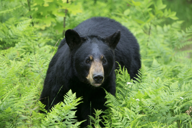

In [82]:
im = PILImage.create('black.jpg')
im.thumbnail((192,192))
im

In [84]:
learn.predict(im)

('black', tensor(0), tensor([9.9982e-01, 7.4518e-05, 1.0467e-04]))

In [86]:
categories = ['black', 'grizzly', 'teddy']
def classify_bears(img):
    img = img.resize((192,192))
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [88]:
classify_bears(im)

{'black': 0.9998136162757874,
 'grizzly': 8.826445991871879e-05,
 'teddy': 9.811852942220867e-05}

In [90]:
image = gr.Image(type='pil')
label = gr.Label()
examples = ['black.jpg', 'grizzly.jpg', 'teddy.jpg']

intf = gr.Interface(fn = classify_bears, inputs = image, outputs = label, examples = examples)
intf.launch(inline = False)

* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
